In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
movies = pd.read_csv("tmdb_movies.csv",usecols=[1,3,7,8,9,10,13,14,15,16],index_col="title")
movies.head()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,genre_id
title,,,,,,,,,
Avatar,237000000,19995,150.437577,10/12/2009,2787965087,162.0,7.2,11800,28.0
Pirates of the Caribbean: At World's End,300000000,285,139.082615,19/05/2007,961000000,169.0,6.9,4500,12.0
Spectre,245000000,206647,107.376788,26/10/2015,880674609,148.0,6.3,4466,28.0
The Dark Knight Rises,250000000,49026,112.312950,16/07/2012,1084939099,165.0,7.6,9106,28.0
John Carter,260000000,49529,43.926995,07/03/2012,284139100,132.0,6.1,2124,28.0


In [7]:
type(movies)
movies.sort_values(by="vote_average",ascending=False,inplace=True)
top_quater = movies["vote_count"].quantile(0.75)
movies.drop(movies[movies.vote_count < top_quater].index, inplace=True)
movies[["vote_average","vote_count"]].head(10)

,vote_average,vote_count
title,,
The Shawshank Redemption,8.5,8205
The Godfather,8.4,5893
Spirited Away,8.3,3840
Whiplash,8.3,4254
The Godfather: Part II,8.3,3338
Pulp Fiction,8.3,8428
Fight Club,8.3,9413
Schindler's List,8.3,4329
The Empire Strikes Back,8.2,5879


In [8]:
movies2 = pd.read_csv("tmdb_movies.csv",usecols=[1,8,9,13],index_col="title")
movies2["release_date"] = pd.to_datetime(movies2["release_date"],dayfirst=True)
movies2 = movies2[(movies2["release_date"].dt.year>2009)&(movies2["release_date"].dt.year<2017)]
movies2 = movies2.groupby(pd.Grouper(key='release_date',freq='YE')).agg({'budget':'mean','revenue':'mean'})
movies2.reset_index(inplace=True)
movies2

,release_date,budget,revenue
0,2010-12-31,3.449541e+07,9.043811e+07
1,2011-12-31,3.477232e+07,9.200413e+07
2,2012-12-31,3.492203e+07,1.160659e+08
3,2013-12-31,3.552329e+07,1.013485e+08
4,2014-12-31,3.095989e+07,1.013466e+08
5,2015-12-31,3.113216e+07,1.054399e+08
6,2016-12-31,4.570327e+07,1.390496e+08


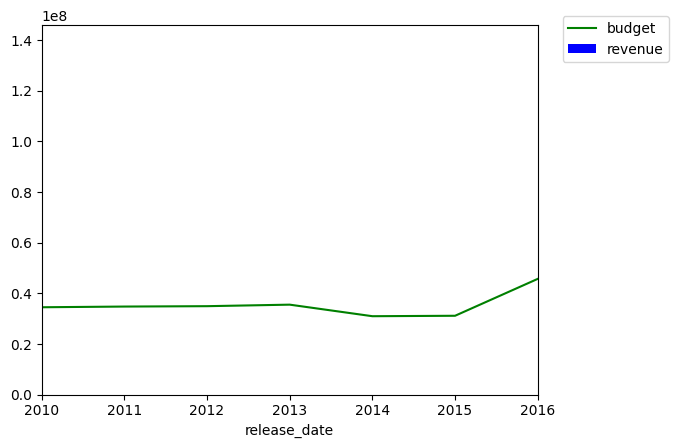

In [71]:
ax = movies2.plot.bar(x="release_date",y="revenue",color="blue")
movies2.plot(x="release_date",y="budget",color="green",ax=ax)
ax.legend(loc=(1.05,0.9))
plt.show()

<Figure size 640x480 with 0 Axes>

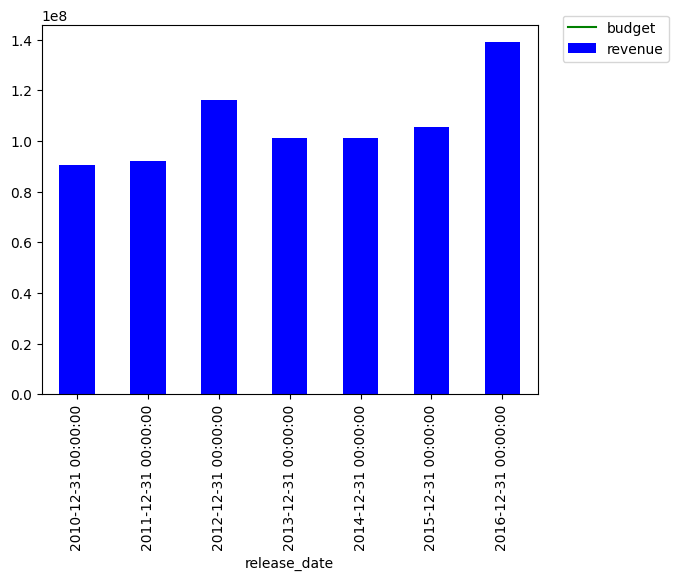

In [70]:
fig=plt.figure()
ax = movies2.plot.line(x="release_date",y="budget",color="green")
movies2.plot.bar(x="release_date",y="revenue",color="blue",ax=ax)
ax.legend(loc=(1.05,0.9))
plt.show()

In [28]:
movies3 = pd.read_csv("tmdb_movies.csv",usecols=[3,10,13,16],index_col="title")
movies3.head()

,id,runtime,genre_id
title,,,
Avatar,19995,162.0,28.0
Pirates of the Caribbean: At World's End,285,169.0,12.0
Spectre,206647,148.0,28.0
The Dark Knight Rises,49026,165.0,28.0
John Carter,49529,132.0,28.0


In [34]:
genres = pd.read_csv("tmdb_genres.csv")
genres.rename(columns={"Unnamed: 0":"genre_id","genres":"Genre"},inplace=True)
movies3 = movies3.merge(genres,how="inner",on="genre_id")

In [36]:
movies3.groupby(by="Genre")["id"].count()

Genre
Action              754
Adventure           339
Animation           123
Comedy             1042
Crime               195
Documentary          89
Drama              1207
Family               56
Fantasy             117
Foreign               2
History              25
Horror              300
Music                34
Mystery              41
Romance             106
Science Fiction      96
TV Movie              4
Thriller            194
War                  24
Western              27
Name: id, dtype: int64

In [69]:
movies3.groupby(by="Genre")["id"].count().max()

1207

In [43]:
runtimes = movies3.pivot_table(values="runtime",index="Genre",aggfunc=np.mean)
runtimes.sort_values(by="runtime",ascending=False,inplace=True)
runtimes

C:\Users\Michal Krzyzanowski\AppData\Local\Temp\ipykernel_12472\201663014.py:1: FutureWarning: The provided callable <function mean at 0x00000200CD79BE20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  runtimes = movies3.pivot_table(values="runtime",index="Genre",aggfunc=np.mean)


,runtime
Genre,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947
Crime,112.143590
TV Movie,110.500000
Action,109.058355
Science Fiction,109.031250


<Axes: title={'center': 'History Movies'}, xlabel='Runtime(mins)', ylabel='Frequency'>

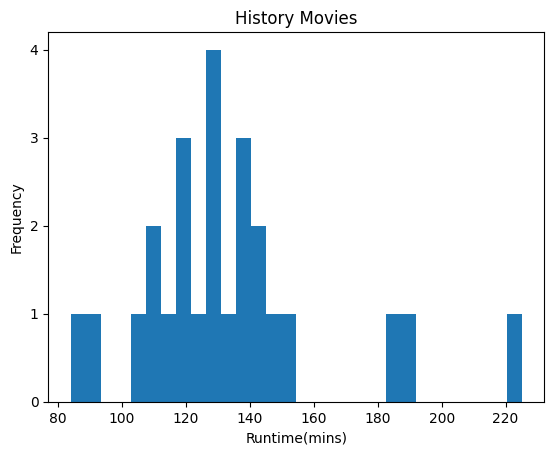

In [59]:
movies3[movies3.Genre=="History"]["runtime"].plot(kind='hist',title="History Movies",bins=30,xlabel="Runtime(mins)",yticks=(0,1,2,3,4))